In [63]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import os
import glob
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ARDL
  
pd.DataFrame.iteritems = pd.DataFrame.items


In [64]:
df = pd.read_excel("Data YAMAHEHOO.xlsx", sheet_name="Albuquerque")
df

,Date,Housing,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,1959-01-01,NaN,NaN,NaN,33.100,NaN,NaN,NaN,NaN,NaN
1,1959-02-01,NaN,NaN,NaN,33.300,NaN,NaN,NaN,NaN,NaN
2,1959-03-01,NaN,NaN,NaN,33.400,NaN,NaN,NaN,NaN,NaN
3,1959-04-01,NaN,NaN,NaN,33.700,NaN,NaN,NaN,NaN,NaN
4,1959-05-01,NaN,NaN,NaN,34.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
778,2023-11-01,461.001003,372.220412,4567.80,326.925,4.808571,NaN,NaN,7.44,NaN
779,2023-12-01,288.434419,373.332825,4769.83,327.604,4.284000,NaN,NaN,6.82,NaN
780,2024-01-01,NaN,NaN,4845.65,334.265,NaN,NaN,NaN,6.64,NaN
781,NaT,NaN,NaN,5096.27,NaN,NaN,NaN,NaN,6.78,NaN


In [65]:
df = df.dropna()
df.index = range(1, len(df) + 1)
df

,Date,Housing,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,455.625386,101.077268,1394.46,144.1,6.670000,0.917000,28.60998,8.21,60.98
2,2000-02-01,447.239418,101.657995,1366.42,144.7,6.410000,0.934333,28.91127,8.33,60.98
3,2000-03-01,469.531214,102.944145,1498.58,145.4,6.140000,0.951667,29.14588,8.24,60.98
4,2000-04-01,366.390557,103.482366,1452.43,145.6,6.270000,0.969000,29.31264,8.15,60.98
5,2000-05-01,427.055297,104.217188,1420.60,144.9,6.360000,0.979333,29.75664,8.52,60.98
...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,189.016430,251.301384,2705.27,236.8,3.087727,0.758333,51.14390,4.59,76.27
222,2018-06-01,194.818811,252.655254,2718.37,239.2,3.013810,0.767667,51.32391,4.57,76.27
223,2018-07-01,190.522959,252.685891,2816.29,239.6,2.976667,0.777000,51.50468,4.53,76.27
224,2018-08-01,205.173138,251.054972,2901.52,239.4,3.006087,0.777000,51.91254,4.55,76.27


In [66]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.979 => Non-stationary.
 Housing : P-Value = 0.787 => Non-stationary.
 Home Price Index : P-Value = 0.413 => Non-stationary.
 S&P 500 Closing Price (USD) : P-Value = 0.998 => Non-stationary.
 Construction Index : P-Value = 0.938 => Non-stationary.
 Bond Yield (US) : P-Value = 0.414 => Non-stationary.
 Land Prices : P-Value = 0.667 => Non-stationary.
 "Wages" : P-Value = 0.948 => Non-stationary.
 Mortgage Rates : P-Value = 0.106 => Non-stationary.
 Population : P-Value = 0.25 => Non-stationary.


In [67]:
df_diffed = df.diff().dropna()

from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed[:].iteritems():
    adfuller_test(column, name=column.name)

 Date : P-Value = 0.921 => Non-stationary.
 Housing : P-Value = 0.0 => Stationary. 
 Home Price Index : P-Value = 0.221 => Non-stationary.
 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.153 => Non-stationary.
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.279 => Non-stationary.


In [68]:
df_diffed2 = df_diffed.diff().dropna()

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_diffed2[:].iteritems():
    adfuller_test(column, name=column.name)

df_diffed2

 Date : P-Value = 0.0 => Stationary. 
 Housing : P-Value = 0.0 => Stationary. 
 Home Price Index : P-Value = 0.0 => Stationary. 
 S&P 500 Closing Price (USD) : P-Value = 0.0 => Stationary. 
 Construction Index : P-Value = 0.0 => Stationary. 
 Bond Yield (US) : P-Value = 0.0 => Stationary. 
 Land Prices : P-Value = 0.0 => Stationary. 
 "Wages" : P-Value = 0.0 => Stationary. 
 Mortgage Rates : P-Value = 0.0 => Stationary. 
 Population : P-Value = 0.0 => Stationary. 


,Date,Housing,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
3,-2 days,30.677765,0.705422,160.20,0.1,-0.010000,1.000000e-09,-0.06668,-0.21,0.0
4,2 days,-125.432454,-0.747928,-178.31,-0.5,0.400000,-1.000000e-09,-0.06785,0.00,0.0
5,-1 days,163.805398,0.196600,14.32,-0.9,-0.040000,-7.000000e-03,0.27724,0.46,0.0
6,1 days,-59.323850,-0.519448,65.83,0.8,-0.250000,1.000000e-09,-0.07017,-0.60,0.0
7,-1 days,-54.574471,0.287828,-57.77,-0.7,0.040000,-1.000000e-09,-0.40913,0.09,0.0
...,...,...,...,...,...,...,...,...,...,...
221,-1 days,38.244457,0.558192,50.04,3.3,0.090108,1.900000e-02,-0.08603,0.09,0.0
222,1 days,9.159152,-2.077964,-44.12,-2.0,-0.149263,9.999999e-10,0.00076,-0.14,0.0
223,-1 days,-10.098234,-1.323232,84.82,-2.0,0.036774,-9.999999e-10,0.00076,-0.02,0.0
224,1 days,18.946032,-1.661557,-12.69,-0.6,0.066563,-9.333333e-03,0.22709,0.06,0.0


In [69]:
from statsmodels import graphics
import statsmodels.api as sm

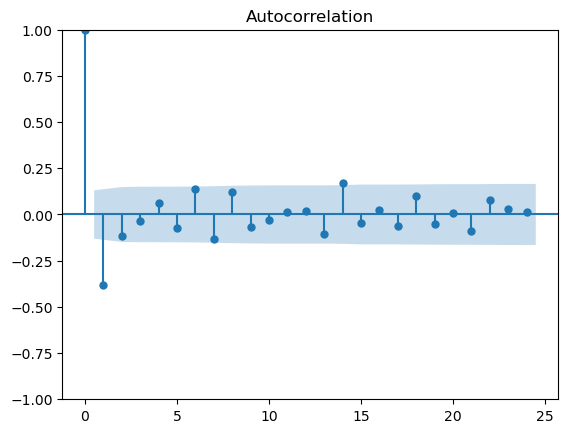

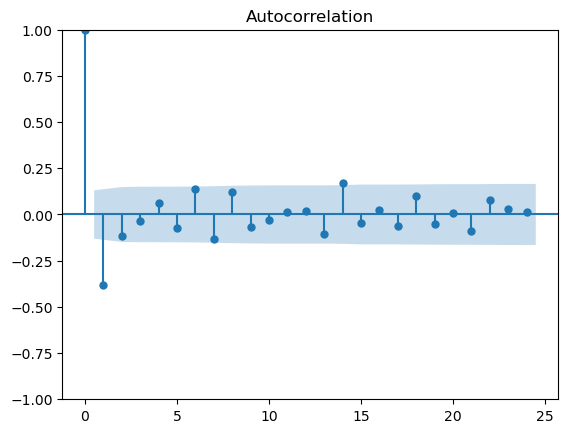

In [70]:
graphics.tsaplots.plot_acf(df_diffed["Housing"])

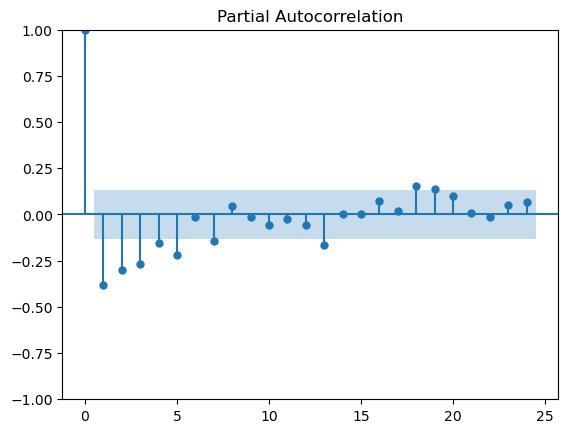

In [71]:
import statsmodels.api as sm
graphics.tsaplots.plot_pacf(df_diffed["Housing"])

house = df_diffed["Housing"].iloc[1:]
dataframe_columns = {"Housing": house}

# "Housing":[1,2,3,4,5,10] 

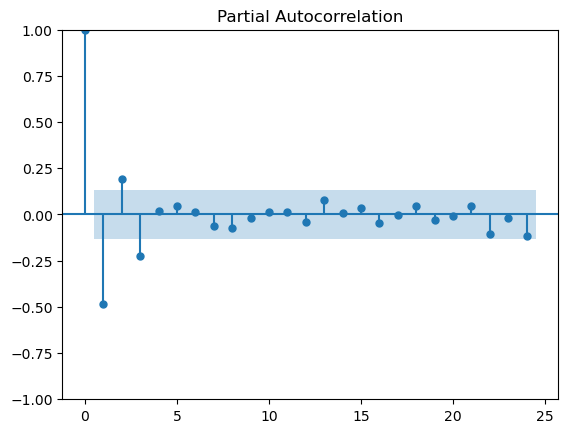

In [72]:
graphics.tsaplots.plot_pacf(df_diffed2["Home Price Index"])

dataframe_columns["Home Price Index"] = df_diffed2["Home Price Index"]

# "Home Price Index": [1,2,3] 

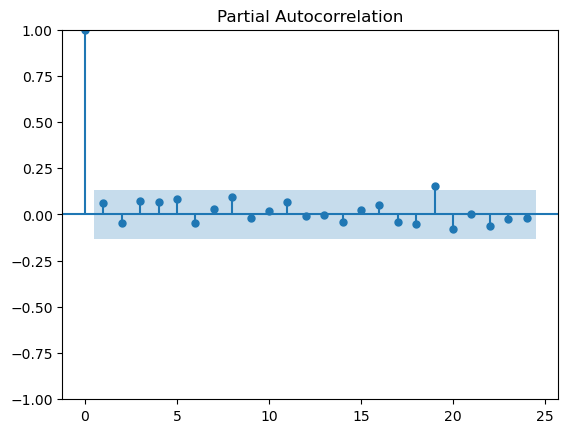

In [73]:
graphics.tsaplots.plot_pacf(df_diffed["S&P 500 Closing Price (USD)"])

dataframe_columns["S&P 500 Closing Price (USD)"] = df_diffed["S&P 500 Closing Price (USD)"].iloc[1:]
# "S&P 500 Closing Price (USD)": [1,2,3,4,7] 

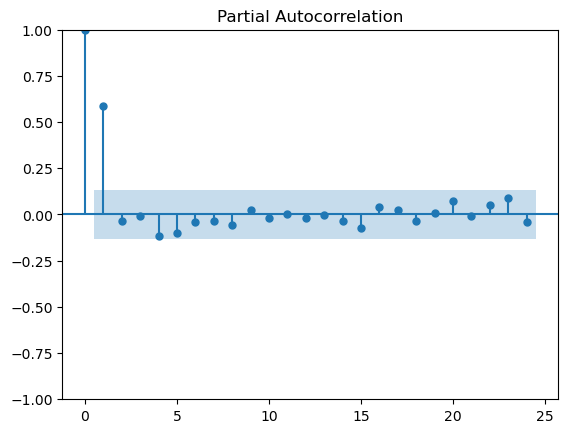

In [74]:
graphics.tsaplots.plot_pacf(df_diffed["Construction Index"])
# Result: [1,2,8] 
dataframe_columns["Construction Index"] = df_diffed["Construction Index"].iloc[1:]


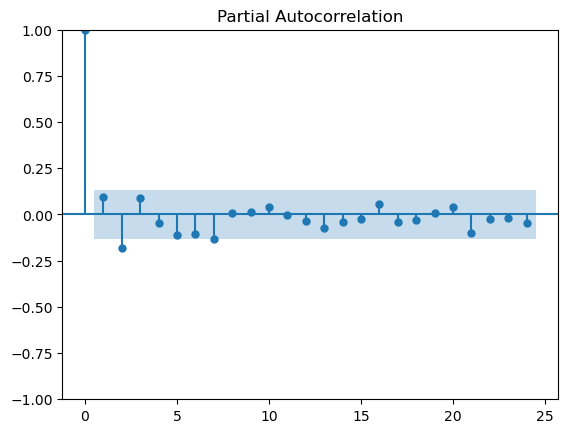

In [75]:
graphics.tsaplots.plot_pacf(df_diffed["Bond Yield (US)"])
# "Bond Yield (US)": [1,2,3,7,8,9] 

dataframe_columns["Bond Yield (US)"] = df_diffed["Bond Yield (US)"].iloc[1:]


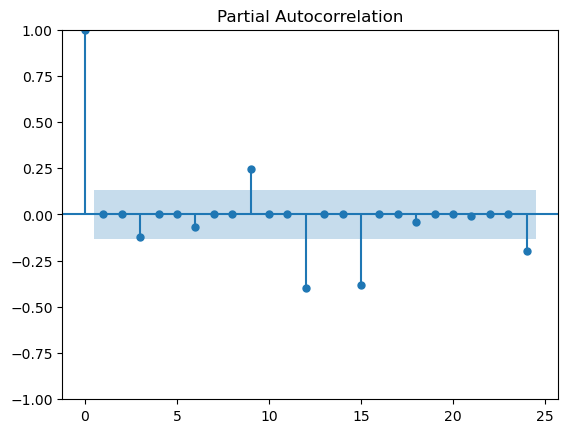

In [76]:
graphics.tsaplots.plot_pacf(df_diffed2["Land Prices"])
# Result: "Land Prices": [3,6] 

dataframe_columns["Land Prices"] = df_diffed2["Land Prices"]



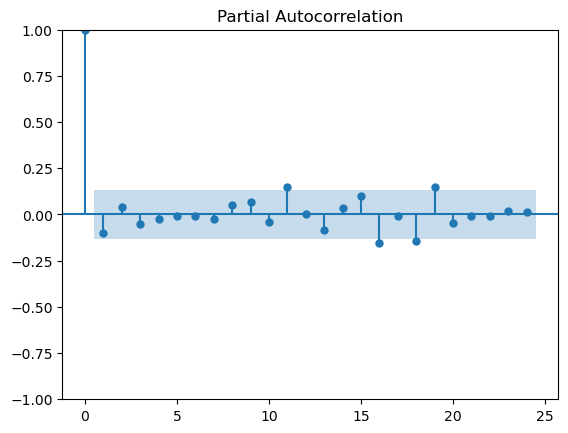

In [77]:
graphics.tsaplots.plot_pacf(df_diffed["\"Wages\""])
# "\"Wages\"": [1,2,3,5,10] 

dataframe_columns["\"Wages\""] = df_diffed["\"Wages\""].iloc[1:]


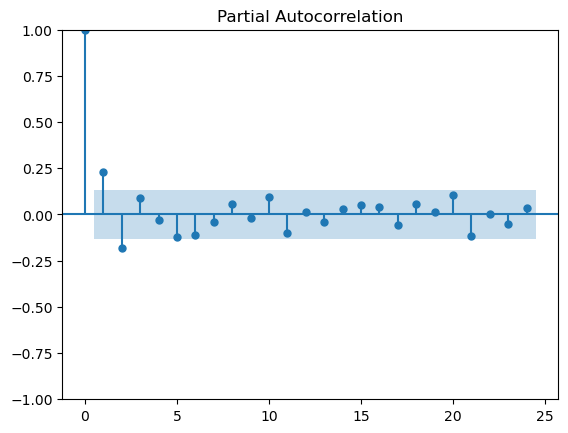

In [78]:
graphics.tsaplots.plot_pacf(df_diffed["Mortgage Rates"])
# Result: "Mortgage Rates": [1,2,3,6,7,9] 

dataframe_columns["Mortgage Rates"] = df_diffed["Mortgage Rates"].iloc[1:]


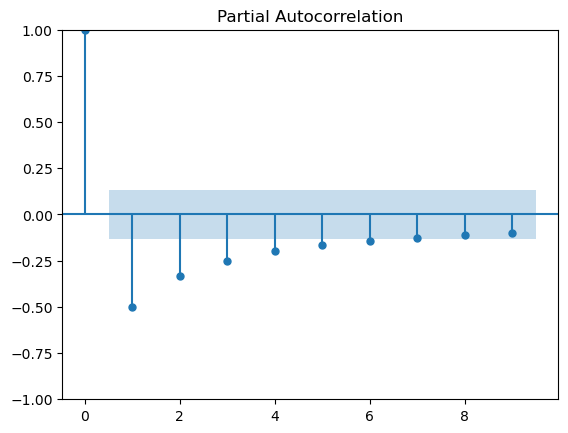

In [79]:
graphics.tsaplots.plot_pacf(df_diffed2["Population"], lags = [i for i in range(10)])
# Result: "Population":[1,2,3,4,5] 

dataframe_columns["Population"] = df_diffed2["Population"]


In [80]:
df_final = pd.DataFrame(data = dataframe_columns)
df_final.index = range(0, len(df_final))
df

,Date,Housing,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
1,2000-01-01,455.625386,101.077268,1394.46,144.1,6.670000,0.917000,28.60998,8.21,60.98
2,2000-02-01,447.239418,101.657995,1366.42,144.7,6.410000,0.934333,28.91127,8.33,60.98
3,2000-03-01,469.531214,102.944145,1498.58,145.4,6.140000,0.951667,29.14588,8.24,60.98
4,2000-04-01,366.390557,103.482366,1452.43,145.6,6.270000,0.969000,29.31264,8.15,60.98
5,2000-05-01,427.055297,104.217188,1420.60,144.9,6.360000,0.979333,29.75664,8.52,60.98
...,...,...,...,...,...,...,...,...,...,...
221,2018-05-01,189.016430,251.301384,2705.27,236.8,3.087727,0.758333,51.14390,4.59,76.27
222,2018-06-01,194.818811,252.655254,2718.37,239.2,3.013810,0.767667,51.32391,4.57,76.27
223,2018-07-01,190.522959,252.685891,2816.29,239.6,2.976667,0.777000,51.50468,4.53,76.27
224,2018-08-01,205.173138,251.054972,2901.52,239.4,3.006087,0.777000,51.91254,4.55,76.27


In [171]:
cutoff_data = df_diffed2.iloc[100:178]
cutoff_data2 = cutoff_data[["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]
cutoff_data["Housing"]

103      8.225308
104    -12.534204
105     24.624763
106     19.918295
107    -78.152228
          ...    
176    -62.997633
177    121.881399
178    120.666160
179   -414.711896
180    219.420309
Name: Housing, Length: 78, dtype: float64

In [136]:
cutoff_data2

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
39,-0.114398,21.58,-8.000000e-01,0.380000,-1.000000e-09,0.13831,-0.01,0.0
40,-0.052158,61.71,7.000000e-01,-0.190000,1.000000e-09,-0.34957,0.15,0.0
41,-0.048942,-22.07,-8.000000e-01,-0.420000,-9.333334e-03,0.05120,-0.39,0.0
42,0.057315,-35.76,4.000000e-01,0.630000,1.000000e-09,-0.00083,0.08,0.0
43,0.128436,4.90,6.000000e-01,0.760000,-1.000000e-09,-0.00080,0.65,0.0
...,...,...,...,...,...,...,...,...
176,0.233003,102.26,4.000000e-01,-0.047577,-1.000000e-03,0.69097,0.02,0.0
177,-0.039760,-103.78,-5.000000e-01,0.204265,1.000000e-09,-0.00216,0.05,0.0
178,0.572015,76.84,2.842171e-14,-0.304373,-1.000000e-09,-0.73104,-0.16,0.0
179,-0.591861,3.75,-3.000000e-01,0.242555,8.000000e-03,0.66719,0.08,0.0


In [257]:
#"Housing":[1,2,3,4,5, 7, 13], 
dict = {"Home Price Index": [0], "S&P 500 Closing Price (USD)": [0], "Construction Index": [0,1], "Bond Yield (US)": [0], "Land Prices": [3], "\"Wages\"": [0], "Mortgage Rates": [0,1], "Population":[1,2,3]}

from statsmodels.tsa.api import ARDL

model = ARDL(cutoff_data["Housing"], [1,2,3, 4], cutoff_data2, dict)
a = model.fit()

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [258]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARDL Model Results                                    
===========================================================================================
Dep. Variable:                             Housing   No. Observations:                   78
Model:             ARDL(4, 0, 0, 1, 0, 3, 0, 1, 3)   Log Likelihood                -413.225
Method:                            Conditional MLE   S.D. of innovations             64.404
Date:                             Fri, 01 Mar 2024   AIC                            862.450
Time:                                     21:46:00   BIC                            903.923
Sample:                                          4   HQIC                           878.994
                                                78                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.9167      8.623      0.106      0.916     -16.351      18.185
Housing.L1                        -1.5098      0.133    -11.367      0.000      -1.776      -1.244
Housing.L2                        -1.5127      0.234     -6.477      0.000      -1.980      -1.045
Housing.L3                        -0.9742      0.234     -4.159      0.000      -1.443      -0.505
Housing.L4                        -0.3763      0.137     -2.739      0.008      -0.651      -0.101
Home Price Index.L0               -3.1809     10.299     -0.309      0.759     -23.803      17.442
S&P 500 Closing Price (USD).L0    -0.2123      0.139     -1.529      0.132      -0.490       0.066
Construction Index.L0              4.6115      9.391      0.491      0.625     -14.193      23.416
Construction Index.L1             -8.7017      8.506     -1.023      0.311     -25.735       8.331
Bond Yield (US).L0                43.0066     57.175      0.752      0.455     -71.485     157.498
Land Prices.L3                    86.2040    704.476      0.122      0.903   -1324.484    1496.892
"Wages".L0                        -3.4109     12.613     -0.270      0.788     -28.667      21.845
Mortgage Rates.L0               -111.1106     67.354     -1.650      0.105    -245.984      23.763
Mortgage Rates.L1                  4.1898     46.893      0.089      0.929     -89.712      98.092
Population.L1                     17.8117     22.944      0.776      0.441     -28.133      63.757
Population.L2                     27.2789     26.772      1.019      0.313     -26.332      80.890
Population.L3                     26.5199     23.229      1.142      0.258     -19.996      73.035
==================================================================================================
"""

In [245]:
blah = df_final[143:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]].reset_index(drop=True)
blah

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,-1.142698,53.27,1.2,0.047500,4.333333e-03,-0.25848,-0.03,-0.33
1,1.441215,42.79,0.6,0.192364,1.000000e-09,-0.68377,0.06,0.00
2,-0.604869,-10.56,0.6,-0.118269,-1.000000e-09,0.60600,-0.04,0.00
3,1.120531,-87.58,0.2,-0.275822,-1.300000e-02,-0.35050,-0.11,0.00
4,-0.223012,51.83,0.1,-0.217035,1.000000e-09,-0.76784,-0.12,0.00
...,...,...,...,...,...,...,...,...
75,0.558192,57.22,4.4,0.075346,1.900000e-02,0.17925,0.12,0.00
76,-2.077964,13.10,2.4,-0.073917,9.999999e-10,0.18001,-0.02,0.00
77,-1.323232,97.92,0.4,-0.037143,-9.999999e-10,0.18077,-0.04,0.00
78,-1.661557,85.23,-0.2,0.029420,-9.333333e-03,0.40786,0.02,0.00


In [255]:
df_final[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]

57

In [264]:
a.predict(15,20)

118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
123   NaN
dtype: float64

In [247]:
x = list(ardl_model.predict(15, 93, exog_oos = df_final[145:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing"][2]] + list(np.asarray(y) + df_diffed["Housing"][2])
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing"][1]] + list(np.asarray(z) + df["Housing"][1])
z

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[455.625385729484,
 447.23941755568,
 492.4158318194428,
 530.3043675501281,
 550.6984357367951,
 521.4700074180987,
 546.7623978834049,
 588.6107166619382,
 524.1569103070017,
 517.1966793364006,
 562.8730070738724,
 589.5941998422204,
 579.5428886965374,
 555.1193927997463,
 525.0805781569089,
 554.2905099854315,
 535.1009212054589,
 439.8339232550934,
 459.6654118862853,
 611.5413833154108,
 642.7534381507917,
 549.9943261601925,
 486.213131451082,
 489.72312445116984,
 553.050784613775,
 559.3033373150396,
 505.02692878811195,
 527.2263597252811,
 536.594903321268,
 504.1790510999883,
 573.504964904751,
 554.4615639905313,
 432.0012833218788,
 438.07468562667367,
 469.65146688644825,
 499.61369640927717,
 508.80143027294446,
 474.16698621373735,
 517.5432954981878,
 527.0811786255811,
 515.1287943174397,
 547.4865341498669,
 537.2654280560736,
 493.5332343340874,
 601.599017548697,
 766.3811185087808,
 773.0869978896819,
 542.6676341634179,
 466.4195449083488,
 262.9305055775045,
 

In [237]:
len(x)
print(1-sum((np.asarray(df["Housing"][180:]) - np.asarray(z[:-3]))**2) / sum((np.asarray(df["Housing"][180:]) - np.mean(df["Housing"][180:]))**2))

ValueError: operands could not be broadcast together with shapes (45,) (78,) 

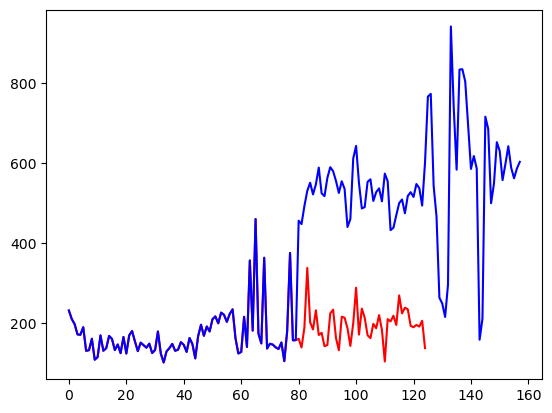

In [248]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(125)], df["Housing"][100:], "r")
plt.plot(list([i for i in range(158)]), list(df["Housing"][100:180]) + z[:-3], "b")
plt.show()

In [87]:
ardl_model.forecast(50, cutoff_data2[-50:])

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


178    123.585155
179   -165.339199
180     58.570468
181   -138.140178
182    256.842878
183   -238.141569
184    187.931920
185    -87.083974
186    -28.604667
187     29.474869
188      2.306993
189      6.271932
190    -45.780627
191     74.540579
192    -47.434695
193     -1.598665
194    138.234071
195   -221.514496
196    167.246684
197    -79.921266
198     62.032251
199      0.654514
200    -68.078201
201     76.503382
202    -49.643699
203     29.234780
204    -79.055566
205     37.338035
206     70.631739
207   -110.442431
208     81.529726
209     70.988306
210   -128.527379
211     66.186357
212    -86.921333
213    189.627666
214   -218.633834
215     76.875078
216     40.369285
217    -75.714552
218     39.301702
219     26.029397
220     18.862892
221    -73.716455
222     33.422784
223    -13.512626
224     38.562205
225    -12.089823
226     -3.764606
227    -14.260433
dtype: float64

In [88]:
list(cutoff_data2["Home Price Index"])[-1]

0.8440450164250137

In [89]:
np.std(cutoff_data2["Home Price Index"])

0.6663405500900149

In [90]:
list(cutoff_data2["Home Price Index"])[-1] + np.random.rand() * 2 * np.std(cutoff_data2["Home Price Index"])

0.985749206126749

In [91]:
def funx(name):
    return(list(cutoff_data2[name])[-1] + np.random.rand() * 2 * np.std(cutoff_data2[name]))

In [92]:
[funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]

[1.1669643662577323,
 9.618450072920837,
 1.1175601582329109,
 0.05990956699012062,
 0.008897912342590948,
 0.04296934796189411,
 -0.02725975796365941,
 0.9013164789853244]

In [93]:
cutoff_data2.iloc[c%168] 

NameError: name 'c' is not defined

In [ ]:
import random
cutoff_data3 = pd.DataFrame(columns = ["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"])
c = 0
for i in range(602):
    cutoff_data3.loc[c] = cutoff_data2.iloc[c%168] + [np.random.rand() * 2 * np.std(cutoff_data2[name]) - np.std(cutoff_data2[name]) for name in ["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]
    #cutoff_data3.loc[c] = [funx("Home Price Index"), funx("S&P 500 Closing Price (USD)"), funx("Construction Index"), funx("Bond Yield (US)"), funx("Land Prices"), funx("\"Wages\""), funx("Mortgage Rates"), funx("Population")]
    c += 1
cutoff_data3

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,0.502417,105.363095,0.949485,0.026717,-0.000485,0.355421,-0.364423,-1.298237
1,-1.344592,-128.672544,0.220174,0.407953,-0.001243,0.459261,0.050677,0.898015
2,0.609051,46.876693,-1.377739,0.011730,0.000795,0.875720,0.578577,0.264032
3,-0.276947,120.221952,1.866066,0.007426,-0.001328,-0.284180,-0.777533,0.384687
4,0.120999,-8.365063,-1.878464,0.192436,0.000024,-0.224562,0.303181,0.404652
...,...,...,...,...,...,...,...,...
597,0.603742,41.281256,0.808121,0.541536,0.001077,-0.112977,-0.162357,1.485966
598,-0.690749,-7.640151,1.725549,-0.457683,-0.003435,-0.203136,-0.013459,4.823677
599,0.125352,45.732498,0.976580,0.308043,-0.005016,-0.610436,0.305220,-3.743808
600,-1.437599,90.457807,1.448194,-0.132263,0.003520,0.049933,-0.282546,-0.135928


In [ ]:
cutoff_data3.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.columns

Index(['Home Price Index', 'S&P 500 Closing Price (USD)', 'Construction Index',
       'Bond Yield (US)', 'Land Prices', '"Wages"', 'Mortgage Rates',
       'Population'],
      dtype='object')

In [ ]:
cutoff_data2.reset_index(drop=True)

,Home Price Index,S&P 500 Closing Price (USD),Construction Index,Bond Yield (US),Land Prices,"""Wages""",Mortgage Rates,Population
0,0.705422,160.20,1.000000e-01,-0.010000,0.001,0.160128,-0.21,0.0
1,-0.747928,-178.31,-5.000000e-01,0.400000,-0.001,0.103378,0.00,0.0
2,0.196600,14.32,-9.000000e-01,-0.040000,0.001,0.482918,0.46,0.0
3,-0.519448,65.83,8.000000e-01,-0.250000,0.001,-0.124505,-0.60,0.0
4,0.287828,-57.77,-7.000000e-01,0.040000,-0.001,0.050298,0.09,0.0
...,...,...,...,...,...,...,...,...
173,0.233003,102.26,4.000000e-01,-0.047577,-0.003,0.198540,0.02,0.0
174,-0.039760,-103.78,-5.000000e-01,0.204265,-0.001,-0.217866,0.05,0.0
175,0.572015,76.84,2.842171e-14,-0.304373,0.001,0.573297,-0.16,0.0
176,-0.591861,3.75,-3.000000e-01,0.242555,0.007,-0.399833,0.08,0.0


In [ ]:
x = list(ardl_model.forecast(598, cutoff_data3))
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing"][2]] + list(np.asarray(y) + df_diffed["Housing"][2])
z2 = []
for i in range(len(y)):
    if i == 0:
        z2.append(y[i])
    else:
        z2.append(y[i] + y[i-1])

z2 = [df["Housing"][1]] + list(np.asarray(z2) + df["Housing"][1])
z2

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[2303.107435,
 2612.638623,
 2892.507227896212,
 2836.2591444007276,
 2689.9670802062055,
 2662.677045628739,
 2927.9960436280985,
 2868.5444923799596,
 2737.968350283969,
 2723.853319976908,
 2779.9591977688588,
 2691.7508991006857,
 2579.0462953270044,
 2728.3654319133043,
 2782.38260237123,
 2873.503688431362,
 2718.622504002761,
 2910.7491779344937,
 3044.171672077962,
 2746.0847352094615,
 2950.64767847963,
 2988.571520479813,
 3260.79328822376,
 2999.7303872966836,
 2852.1368652372125,
 3285.537865736395,
 2961.2757965472224,
 3000.933323682515,
 3195.2344613487494,
 2851.9033484078777,
 3065.4935761285337,
 3284.863305296979,
 3000.4960572027076,
 3228.56324094952,
 3108.26700055808,
 3037.656621872395,
 3199.0350481310543,
 2992.3859760430773,
 3230.439362482614,
 3129.9815651632025,
 3043.1460313673715,
 3255.4651330624356,
 3142.9922192943254,
 3292.156891793078,
 3289.5530497009313,
 3063.148903862269,
 3008.0157829572463,
 3369.620038745291,
 3284.4065006176365,
 3009.42427

In [278]:
x = []
a = 344503
for val in [2303.107435,
 2612.638623,
 2892.507227896212,
 2836.2591444007276,
 2689.9670802062055,
 2662.677045628739,
 2927.9960436280985,
 2868.5444923799596,
 2737.968350283969,
 2723.853319976908,
 2779.9591977688588,
 2691.7508991006857,
 2579.0462953270044,
 2728.3654319133043,
 2782.38260237123,
 2873.503688431362,
 2718.622504002761,
 2910.7491779344937,
 3044.171672077962,
 2746.0847352094615,
 2950.64767847963,
 2988.571520479813,
 3260.79328822376,
 2999.7303872966836,
 2852.1368652372125,
 3285.537865736395,
 2961.2757965472224,
 3000.933323682515,
 3195.2344613487494,
 2851.9033484078777,
 3065.4935761285337,
 3284.863305296979,
 3000.4960572027076,
 3228.56324094952,
 3108.26700055808,
 3037.656621872395,
 3199.0350481310543,
 2992.3859760430773,
 3230.439362482614,
 3129.9815651632025,
 3043.1460313673715,
 3255.4651330624356,
 3142.9922192943254,
 3292.156891793078,
 3289.5530497009313,
 3063.148903862269,
 3008.0157829572463,
 3369.620038745291,
 3284.4065006176365,
 3009.4242755762198,
 3125.575001063641,
 3268.620834563966,
 3111.2170867207606,
 3114.167276164332,
 3118.4801807630374,
 2998.6676379320606,
 3463.2438648611205,
 3015.5548680151187,
 2866.429742747584,
 3358.95745195319,
 3347.6600393653507,
 3351.0860472904174,
 3053.786946968669,
 3291.844187402696,
 3311.195831011568,
 2792.137848551717,
 3329.7847556503266,
 3334.574600146931,
 3266.4112119290003,
 3433.5658522422445,
 3293.403136274258,
 3427.4757816148476,
 3323.201754539773,
 3547.6320352810108,
 3376.5532369074936,
 3450.647597654347,
 3479.519247665848,
 3203.6220511030306,
 3539.485071017476,
 3479.7163947028534,
 3392.824665876494,
 3467.893182928466,
 3481.5555503110463,
 3469.5137555174415,
 3486.1085365689114,
 3635.930665916544,
 3431.025538345438,
 3556.4846452402935,
 3432.522588121094,
 3178.8220432907,
 3363.7710724458357,
 3449.020065063658,
 3429.60603037084,
 3186.9702320189267,
 3302.0003798795947,
 3558.1997414916564,
 3145.131600431703,
 3637.2636218994785,
 3548.3984572130685,
 3312.303399413105,
 3787.94950558014,
 3251.4903959955877,
 3521.597644350595,
 3460.608718845854,
 3224.4981744071943,
 3510.4954193616722,
 3249.2062669632624,
 3361.5859555636193,
 3352.4199422577185,
 3456.9685163974837,
 3785.089759866247,
 3726.1116205542703,
 3833.158498713375,
 3831.2075698889676,
 4224.886858753103,
 4016.5613873813295,
 3556.3671875094,
 4111.960535226456,
 3939.7780917036966,
 3799.2882362975424,
 3890.954587875854,
 3499.2227614306166,
 3694.582136677041,
 3614.365854211413,
 3646.143980927476,
 3625.213243953615,
 3192.453842565213,
 3612.279989802398,
 3719.8908557992836,
 3464.0717895743655,
 3650.3056194944393,
 3654.559605715586,
 3479.785450768024,
 3556.04498439865,
 3480.2742306276587,
 3700.663114973699,
 3789.41602813587,
 3499.027462530682,
 3702.6328866136087,
 3390.4561424691565,
 3545.5867462949213,
 3797.167665149967,
 3405.6509406422683,
 3750.922450345565,
 3695.0770452334777,
 3786.8263163765405,
 4068.0777990949223,
 3614.9576441010063,
 3658.736224499618,
 3748.2730576440367,
 3863.967344076428,
 3727.642174200938,
 3467.46847578279,
 3739.812202920119,
 3552.0745947625787,
 3436.9248810038503,
 3592.1483959295656,
 3620.7243470734506,
 3729.7144021230242,
 3563.7156066734533,
 3619.080134168345,
 3412.9033654092595,
 3433.36643614209,
 3595.25659030131,
 3303.6527962365753,
 3287.3509010362236,
 3171.684674492059,
 3116.8869110755545,
 3144.508608484228,
 3510.076630627412,
 3284.8647093262475,
 3063.018241890355,
 3330.3523351952126,
 3125.58163555436,
 3207.878907602615,
 3144.7125601571297,
 3124.6574457011966,
 3377.3094490353133,
 3489.189602648822,
 3386.373391458853,
 3277.743937756475,
 3419.2931288395603,
 3516.030352960782,
 3440.928503788804,
 3246.3035656168477,
 3206.741062850476,
 3127.1245725688086,
 3157.1456280596185,
 3292.1931248412757,
 3378.2608334988577,
 3573.345662493217,
 3312.2571892306423,
 3314.078197815306,
 3652.895317906563,
 3518.77536851638,
 3429.7736803733674,
 3605.6178999107296,
 3457.972050203875,
 3485.159299397041,
 3731.006041798732,
 3526.779748704477,
 3713.1741642157094,
 3741.3597884999863,
 3623.9017324655583,
 3802.1731766169646,
 3563.301350134941,
 3646.53739449805,
 3674.631118073207,
 3438.21820114949,
 3675.2569692684106,
 3738.5240962926982,
 3710.633310591538,
 3530.3758092884646,
 3421.267003515663,
 3417.5346972207894,
 3605.0540397261975,
 3512.6981084069166,
 3304.400421348332,
 3532.937433977274,
 3505.367020953962,
 3402.9179238445136,
 3305.4143457167816,
 3005.1525260596386,
 3030.6922243688186,
 3393.4045411254233,
 3039.9491844092954,
 2940.4601464074417,
 3149.5356801674416,
 3157.6593761148015,
 3183.333830210795,
 2911.8177912677247,
 2919.445064714208,
 2972.8119138347874,
 2819.4645781970676,
 3098.56534465287,
 3076.6219579047224,
 2918.306695720001,
 3135.6713309615197,
 3190.229355100441,
 3006.9078859768665,
 2759.056732460057,
 3041.175346325622,
 2935.9309065996654,
 2822.4392915114854,
 2880.738260645742,
 2515.4944646344597,
 2827.964571536583,
 2998.85780024118,
 2813.617628277423,
 2846.540779923561,
 2905.026543224882,
 2900.4497039683556,
 3017.4455556743096,
 3256.0284661305577,
 3028.9430322013995,
 3051.576964706348,
 2921.526464988281,
 2701.382560686657,
 2831.8700858327084,
 2900.410242571346,
 2748.5342573306625,
 2697.0638281760635,
 2838.3897458362844,
 2886.7600701984634,
 2687.228616307148,
 3062.0170803114574,
 3209.8391140686736,
 3016.7195545166087,
 3187.1080509016865,
 2851.8174586722625,
 3060.8071256325693,
 3056.791432171149,
 2620.9301498556606,
 2850.33484922326,
 2970.2804128387625,
 2884.009812030886,
 2792.8719839673213,
 2947.036141654383,
 3267.756624652331,
 3210.7724847667087,
 3058.1129865180883,
 2979.786869669861,
 3420.748785479762,
 3201.8526866725983,
 2901.544771703388,
 3507.234205348982,
 3254.5615233745443,
 3139.5546293183634,
 3330.8292317145283,
 2839.1563654916113,
 2944.23986647327,
 3056.2159281336453,
 2912.2421519037725,
 2856.4894669542755,
 2694.6889471768854,
 2862.5534662806535,
 2986.258417747285,
 2784.150808672848,
 2845.5916633151282,
 2847.2349639277118,
 2672.3270041917867,
 3001.0335220887273,
 2771.5051416829065,
 2921.0705064733475,
 3101.358326693851,
 2771.0068269750973,
 2977.573132568796,
 2726.76153417193,
 2809.213573966773,
 2994.987954211242,
 2836.8145157390145,
 3066.341419004101,
 3187.760083014632,
 3336.437271116846,
 3297.3609834629633,
 3077.1545777523165,
 3161.808898214255,
 3237.101645896597,
 3336.491722471319,
 3002.1088149036595,
 2813.0454401890474,
 3190.3769131103945,
 3029.8919397037726,
 3018.2645408426174,
 3175.431801217506,
 3167.514816890007,
 3094.2170216685054,
 2938.016327333139,
 3166.9289107489926,
 2952.492795281065,
 3150.1257955168194,
 2986.693165607147,
 2840.7833818429426,
 3027.364984065849,
 2795.5221851965116,
 3011.9261401139465,
 2759.908444104143,
 3259.3013773942707,
 3352.5898370921464,
 2838.26333851264,
 2995.919879553831,
 2672.648863496721,
 2933.7001820879195,
 2934.3065992726447,
 2581.2859829721883,
 2739.8101394550868,
 2874.5139093681055,
 2905.628185541186,
 2573.332368139357,
 2555.404236950301,
 2773.113936359188,
 2815.6307055506004,
 2604.92942222555,
 2662.206511578467,
 2748.5404726030356,
 2560.116093975818,
 2632.0528091872466,
 2793.600938887683,
 3069.048438250942,
 2650.4769717837726,
 2556.2721315698946,
 2880.7356147105106,
 2756.3683932018057,
 2625.5840588568444,
 2558.346178484125,
 2442.957503341177,
 2582.766840159871,
 2809.551729840262,
 2371.7385503083533,
 2642.654434515144,
 2662.7795371198317,
 2588.1023882473914,
 2859.0716593140837,
 2366.0340889592076,
 2755.273146419758,
 2966.15398446581,
 2625.2758543584605,
 2799.908927678739,
 2900.203917238984,
 3002.921741837392,
 2787.81201486604,
 2816.8272004814935,
 2821.0938226410553,
 2942.3609798780226,
 2853.4051416425973,
 2521.013066717351,
 2819.0608692623346,
 2886.6567064429532,
 2745.933159375169,
 2784.1235595204344,
 2620.6027164891107,
 2622.5162603313534,
 3039.8294687849148,
 2748.4467761889778,
 2646.271312275936,
 2962.269638340528,
 3066.7320212467343,
 2993.4523678523565,
 2807.6016659014686,
 2876.256298289746,
 2798.064304190538,
 2749.036921276141,
 3032.680883030951,
 2966.6774560726053,
 2888.2947821934426,
 2958.3945855590778,
 3119.2653310085443,
 2925.631471774256,
 2638.6343164815507,
 2978.2977235828716,
 2769.5132078854976,
 2876.2643920736054,
 2902.1005610171537,
 2630.954784853733,
 2924.5096957006986,
 2967.048901843877,
 2759.069996712936,
 2784.4041812143223,
 2824.748139206252,
 2920.123781825775,
 3065.661231961566,
 3185.0196076128886,
 2990.9283273282035,
 2888.9565902042614,
 2919.051372172914,
 2766.2382812263463,
 2749.0329042877984,
 2703.7550267196134,
 2755.5610409578417,
 2583.9042221364393,
 2643.0473823439843,
 2842.653888252868,
 2374.1387690144365,
 2821.0111133165965,
 2837.4073273873882,
 2417.8699916083074,
 2712.932207203511,
 2452.7255623560345,
 2743.4640516692516,
 2638.3152840362263,
 2283.521791309641,
 2606.611054685074,
 2626.6033384286475,
 2423.672786099175,
 2326.6163139442347,
 2499.802050897367,
 2721.7584297843277,
 2750.2802297696358,
 2595.8062674766497,
 2625.3168633605133,
 3112.9805786567426,
 2787.304200934869,
 2392.7751602424346,
 2833.504282546095,
 2623.26585466562,
 2547.2510470593,
 2671.4775283396257,
 2213.6136579607482,
 2204.594676153027,
 2262.2317358797764,
 2250.0957799914668,
 2178.2342878216327,
 1764.1536919941773,
 1873.87589635977,
 2207.9006051526057,
 2021.5782042994633,
 2089.9964956600816,
 2029.0074022284984,
 1902.173035786313,
 2325.8538879644425,
 2021.2291058433489,
 2003.471258623729,
 2255.103317877259,
 1970.7196836363141,
 2187.822774522779,
 1941.408545095476,
 1999.3017975956907,
 2240.38363340531,
 1927.2106670398346,
 2347.5071487674277,
 2280.5589646246826,
 2183.529320418117,
 2262.8011562344414,
 2077.8370304877076,
 2162.5903773511245,
 2129.561408615572,
 2235.6697493384536,
 2094.8594081931533,
 1909.512674536109,
 2192.030646441135,
 2198.4884996733435,
 2018.7039708671623,
 2090.319215726517,
 2183.883802940689,
 2009.2688103754901,
 1958.5643810846946,
 2166.7360180226788,
 1967.1607822838018,
 2243.5940391423205,
 2162.98112027079,
 1935.3997723765492,
 2274.9930790161466,
 2129.3391242406733,
 2148.086170224465,
 2033.6457365130059,
 2546.0360706737815,
 2592.3372771677246,
 2158.395410199154,
 2397.0213689189604,
 2064.18283622126,
 2489.3384935477925,
 2297.9885020273287,
 1943.9789705191163,
 2398.5698879026686,
 2315.3558569443157,
 2320.432298009985,
 2282.122558016633,
 2268.0603635611305,
 2327.4639758487456,
 2468.575619481079,
 2482.9793696205907,
 2407.98339263917,
 2286.309991871601,
 2240.9632382362997,
 2325.0068468039804,
 2266.5268188692476,
 2622.365968044715,
 2418.167962469841,
 2342.797148271172,
 2635.3438090579707,
 2457.5088808913683,
 2474.6269388588794,
 2625.677916004589,
 2336.165698328138,
 2478.5937700017334,
 2582.403705624839,
 2259.021409616871,
 2705.2083407944965,
 2626.3586169299792,
 2507.8176709002264,
 2611.8045126921215,
 2505.090196199305,
 2686.1491188157893,
 2668.4730453902384,
 2505.1501624598595,
 2596.8202089663237,
 2788.280173420768,
 2755.857447512306,
 2584.562802846211,
 2589.7769534311874,
 2482.6647061334706,
 2584.0338705670606,
 2550.904450079986,
 2444.8864172727876,
 2736.64286761537,
 2736.6601878747824,
 2546.880378073692,
 2575.6697674217526,
 2436.987609088827,
 2268.4449204484235,
 2598.5664731354877,
 2452.274619242381,
 2421.6246419040494,
 2581.1499315387377,
 2419.1568850863614,
 2577.0147364577624,
 2392.4765517882533,
 2390.4606428737297,
 2337.9647103901107,
 2177.0925674564924,
 2538.2252030288087,
 2316.6849095123193,
 2327.1095692837944,
 2381.4042510424943,
 2308.068769331892,
 2404.3145883542447,
 2155.4860672762693,
 2444.011415620588,
 2190.0917451850546,
 2082.732284052176,
 2352.546647032954,
 2131.44755758771,
 2276.9851325748978,
 2323.300212010623,
 2137.5702158873705,
 2065.9414416746467,
 2099.2065579774526,
 2228.2610610468446,
 2255.850331227894,
 2371.272032167893,
 2286.6940291586616,
 2114.288785422016,
 2049.772693713863,
 1868.8696115613575,
 2004.3499264667691,
 2087.678852468102,
 1820.8042618320474,
 1707.7293617787018,
 1867.36576536835,
 2060.1286211479023]:
   a = a+val
   x.append(a + val)
   
x

[349109.21487,
 352031.384681,
 355203.7605137924,
 357983.77157469763,
 360527.4465907093,
 363162.83360176056,
 366356.148643388,
 369165.2415845198,
 371772.6337927078,
 374482.3720823776,
 377318.4371579385,
 379921.97975837096,
 382388.3214499243,
 385266.0060184239,
 388102.405791253,
 391067.0305657445,
 393630.7718853187,
 396733.6477371849,
 399911.24190340634,
 402359.2397017473,
 405514.45032349706,
 408540.94568597706,
 412073.9607419447,
 414812.6282283144,
 417517.1715714921,
 421236.1104377277,
 423873.1241650858,
 426913.7150159036,
 430303.25061491854,
 432811.82285038556,
 436090.9066542348,
 439595.1396887002,
 442311.2684978086,
 445767.898922505,
 448755.8696826716,
 451722.9159258583,
 455083.32940024807,
 457869.0663042031,
 461337.5590531253,
 464367.08282096905,
 467323.3933185406,
 470791.1775532981,
 473821.6968588243,
 477263.0184231161,
 480549.9676307249,
 483386.71238874854,
 486339.59505080077,
 490070.8193453341,
 493270.01230782404,
 496004.4543583588,

In [283]:
x[598] - 344503

1747369.3330487856

In [ ]:
len(z2)

50

In [ ]:
len(z)

48

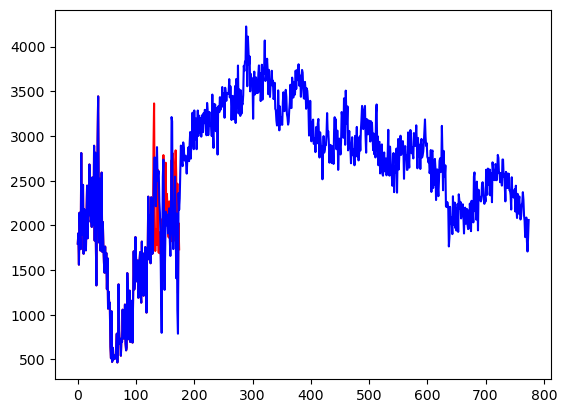

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(175)], df["Housing"][50:], "r")
plt.plot(list([i for i in range(775)]), list(df["Housing"][50:180]) + z[:-3] + z2, "b")
plt.show()

OLD

In [ ]:
x = list(ardl_model.predict(10, 62, exog_oos = df_diffed2[170:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]
y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing"][180]] + list(np.asarray(y) + df_diffed["Housing"][180])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing"][179]] + list(np.asarray(z) + df["Housing"][179])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i+178 for i in range(len(z))], z, "b")
plt.plot([i for i in range(len(df["Housing"]))], df["Housing"], "r")
plt.show()

In [ ]:
x = list(ardl_model.predict(10, 100, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing"][177]] + list(np.asarray(y) + df_diffed["Housing"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing"][176]] + list(np.asarray(z) + df["Housing"][176])
z

In [ ]:
x = list(ardl_model.predict(10, 46, exog_oos = df_diffed2[166:][["Home Price Index", "S&P 500 Closing Price (USD)", "Construction Index", "Bond Yield (US)", "Land Prices", "\"Wages\"", "Mortgage Rates", "Population"]]))[:-3]

y = []
for i in range(len(x)):
    if i == 0:
        y.append(x[i])
    else:
        y.append(x[i] + y[i-1])

y = [df_diffed["Housing"][177]] + list(np.asarray(y) + df_diffed["Housing"][177])
print(y)
z = []
for i in range(len(y)):
    if i == 0:
        z.append(y[i])
    else:
        z.append(y[i] + y[i-1])

z = [df["Housing"][176]] + list(np.asarray(z) + df["Housing"][176])
z

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(list(ardl_model.predict(0, 166)[7:164]) + list([i for i in range(len(x))])))], list(ardl_model.predict(0, 166)[7:164]) + x, "b")
plt.plot([i for i in range(len(df_diffed2["Housing"]))], df_diffed2["Housing"], "r")
plt.show()

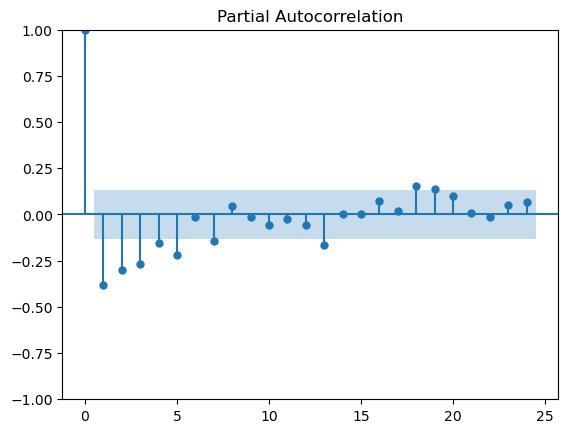

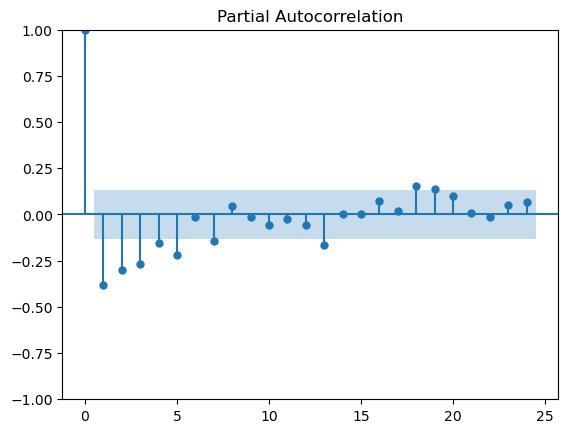

In [120]:
import statsmodels.api as sm
graphics.tsaplots.plot_pacf(df_diffed["Housing"])

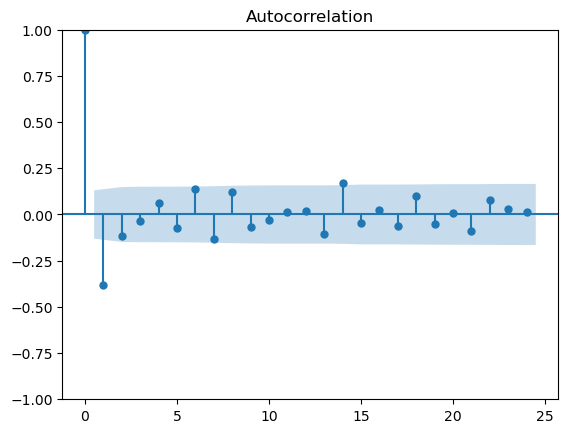

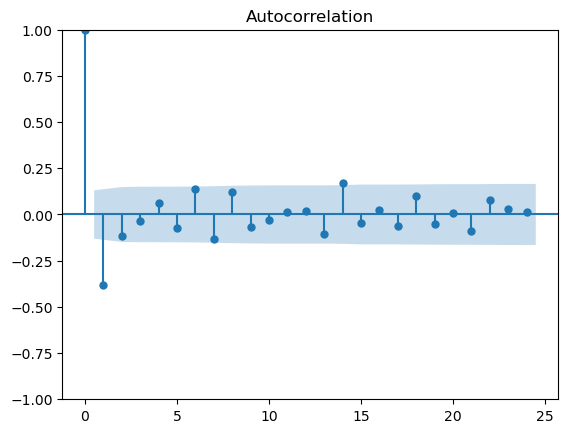

In [126]:
graphics.tsaplots.plot_acf(df_diffed["Housing"])

In [270]:
arimamodel = sm.tsa.arima.ARIMA(df_diffed["Housing"][:-36], order=(4,1,1))
res = arimamodel.fit()
res.summary()

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Housing   No. Observations:                  188
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1143.578
Date:                Fri, 01 Mar 2024   AIC                           2299.156
Time:                        22:27:33   BIC                           2318.543
Sample:                             0   HQIC                          2307.012
                                - 188                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6082      0.055    -11.109      0.000      -0.716      -0.501
ar.L2         -0.4869      0.071     -6.824      0.000      -0.627      -0.347
ar.L3         -0.3448      0.091     -3.799      0.000      -0.523      -0.167
ar.L4         -0.1490      0.083     -1.785      0.074      -0.313       0.015
ma.L1         -1.0000     43.249     -0.023      0.982     -85.767      83.767
sigma2      1.152e+04   4.98e+05      0.023      0.982   -9.65e+05    9.88e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               338.62
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


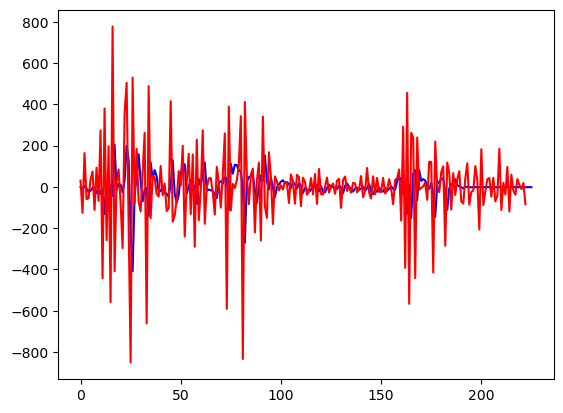

In [271]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(226)], res.predict(start=0, end=225), "b")
plt.plot([i for i in range(223)], df_diffed2["Housing"], "r")
plt.show()

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\thewa\AppData\Local\Temp\ipykernel_5884\3870225436.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x.append(float(res.predict(i)))
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\sta

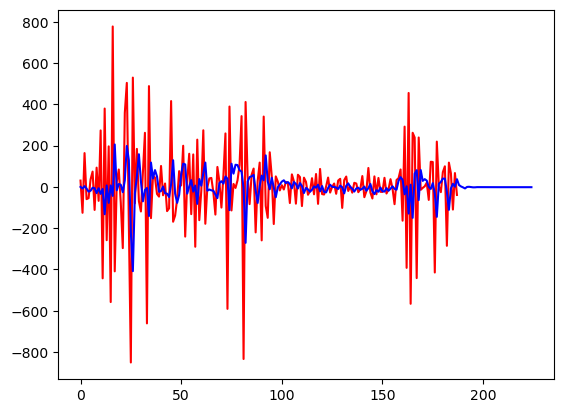

In [273]:
x = []
for i in range(len(res.predict(0)),225):
    x.append(float(res.predict(i)))

import matplotlib.pyplot as plt
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing"][:(len(res.predict(0)))], "r")
plt.plot([i for i in range(225)], list(res.predict(0))+list(x), "b")
plt.show()

In [274]:
x = []
for i in range(len(res.predict(0)),825):
    x.append(float(res.predict(i)))

c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\thewa\AppData\Local\Temp\ipykernel_5884\1449515921.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x.append(float(res.predict(i)))
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thewa\anaconda3\Lib\site-packages\sta

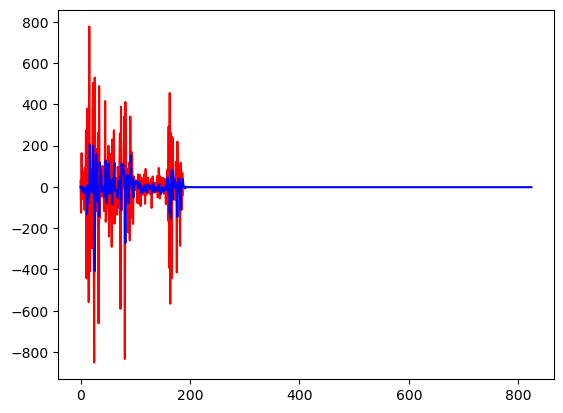

[9.406688007667832,
 2.2377177234816976,
 -2.1559383622121624,
 -7.389996624238663,
 -0.19959352300382083,
 0.5587133259635211,
 -0.9441689691900104,
 -2.098317199523814,
 -1.9976276399705322,
 -1.0917674183420125,
 -1.069862927989642,
 -1.3869610666391836,
 -1.5320823174319416,
 -1.4319746809585745,
 -1.316139935503597,
 -1.338044362942685,
 -1.3940085159279618,
 -1.4041604664829483,
 -1.3804477507326074,
 -1.3673679531387046,
 -1.3750286059041097,
 -1.3834003494747107,
 -1.3826219875576011,
 -1.3783273018696687,
 -1.3772903797744502,
 -1.3790328543886847,
 -1.3800746144723186,
 -1.3795901250546072,
 -1.3789313429782273,
 -1.3789490731692284,
 -1.3792708353808336,
 -1.3793658341280086,
 -1.379243453546078,
 -1.3791580557444543,
 -1.379188878198089,
 -1.3792397473780207,
 -1.3792414815309177,
 -1.3792177586903815,
 -1.3792092112437495,
 -1.3792177816866669,
 -1.3792246512752997,
 -1.3792227824545809,
 -1.3792188932776466,
 -1.3792185229782217,
 -1.379220262384169,
 -1.379221004135178,


In [275]:
plt.figure()
plt.plot([i for i in range(len(res.predict(0)))], df_diffed2["Housing"][:(len(res.predict(0)))], "r")
plt.plot([i for i in range(825)], list(res.predict(0))+list(x), "b")
plt.show()
x